In [266]:
import pandas as pd
import matplotlib.pyplot as plt
import missingno as msno
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
plt.style.use('dark_background')

In [267]:
data = pd.read_csv('C:/Users/Theophilus Bassaw/Downloads/seattle-weather.csv')
data

,date,precipitation,temp_max,temp_min,wind,weather
0,2012-01-01,0.0,12.8,5.0,4.7,drizzle
1,2012-01-02,10.9,10.6,2.8,4.5,rain
2,2012-01-03,0.8,11.7,7.2,2.3,rain
3,2012-01-04,20.3,12.2,5.6,4.7,rain
4,2012-01-05,1.3,8.9,2.8,6.1,rain
...,...,...,...,...,...,...
1456,2015-12-27,8.6,4.4,1.7,2.9,rain
1457,2015-12-28,1.5,5.0,1.7,1.3,rain
1458,2015-12-29,0.0,7.2,0.6,2.6,fog
1459,2015-12-30,0.0,5.6,-1.0,3.4,sun


<AxesSubplot:>

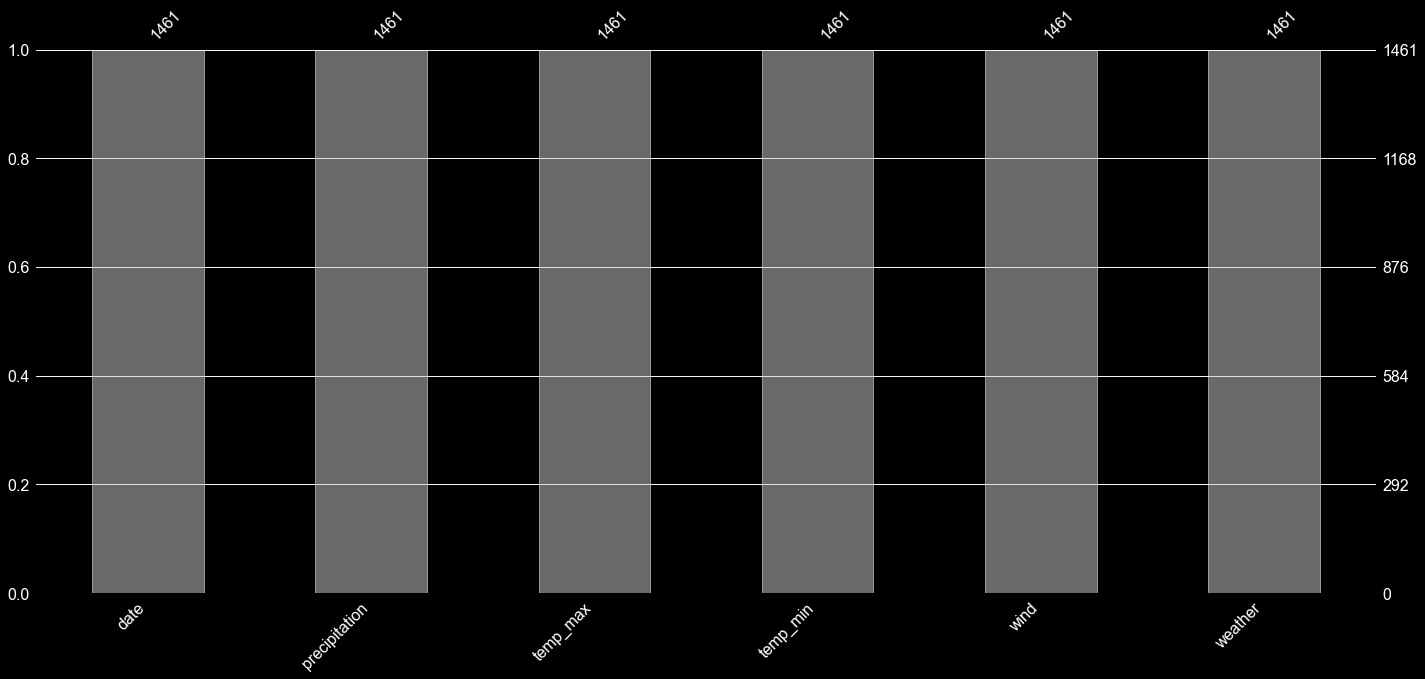

In [268]:
msno.bar(data)

<AxesSubplot:xlabel='precipitation', ylabel='count'>

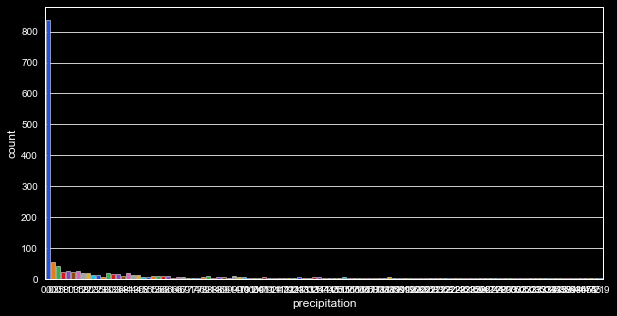

In [269]:
#sns.set_style('darkgrid')
plt.figure(figsize=(10,5))
sns.countplot(x='precipitation',palette='bright',data=data)

<AxesSubplot:xlabel='temp_max', ylabel='precipitation'>

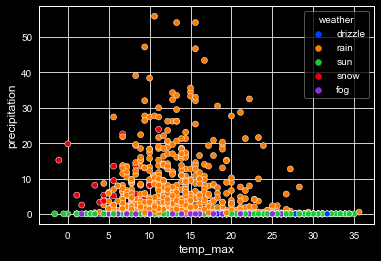

In [270]:
#sns.set_style('darkgrid')
sns.scatterplot(x='temp_max',y='precipitation',palette='bright',hue='weather',data=data)

<AxesSubplot:xlabel='temp_min', ylabel='precipitation'>

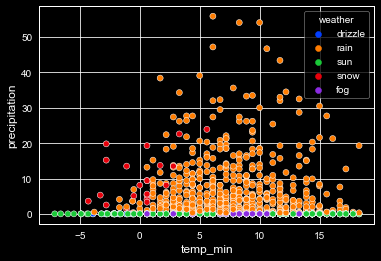

In [271]:
sns.scatterplot(x='temp_min',y='precipitation',palette='bright',hue='weather',data=data)

<AxesSubplot:ylabel='Frequency'>

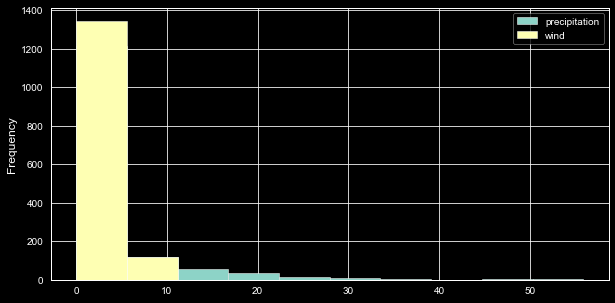

In [272]:
data[['precipitation','wind']].plot(kind='hist',bins=10,figsize=(10,5))

<AxesSubplot:xlabel='weather', ylabel='count'>

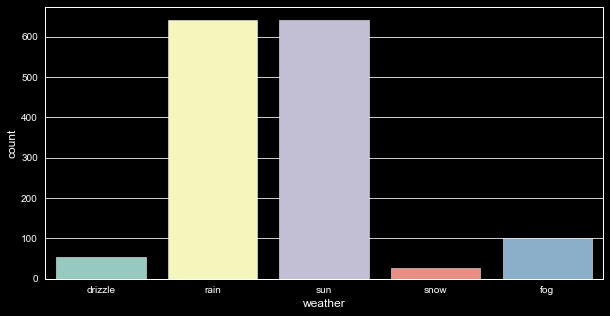

In [273]:
plt.figure(figsize=(10,5))
sns.countplot('weather',data=data)

In [274]:
data.date

0       2012-01-01
1       2012-01-02
2       2012-01-03
3       2012-01-04
4       2012-01-05
           ...    
1456    2015-12-27
1457    2015-12-28
1458    2015-12-29
1459    2015-12-30
1460    2015-12-31
Name: date, Length: 1461, dtype: object

In [275]:
data[['year','month','day']] = data['date'].str.split('-',expand=True)

In [276]:
data[['year','month','day']]

,year,month,day
0,2012,01,01
1,2012,01,02
2,2012,01,03
3,2012,01,04
4,2012,01,05
...,...,...,...
1456,2015,12,27
1457,2015,12,28
1458,2015,12,29
1459,2015,12,30


In [277]:
data=data[['precipitation', 'temp_max', 'temp_min', 'wind', 'weather',
       'year', 'month', 'day']].copy()

In [278]:
data

,precipitation,temp_max,temp_min,wind,weather,year,month,day
0,0.0,12.8,5.0,4.7,drizzle,2012,01,01
1,10.9,10.6,2.8,4.5,rain,2012,01,02
2,0.8,11.7,7.2,2.3,rain,2012,01,03
3,20.3,12.2,5.6,4.7,rain,2012,01,04
4,1.3,8.9,2.8,6.1,rain,2012,01,05
...,...,...,...,...,...,...,...,...
1456,8.6,4.4,1.7,2.9,rain,2015,12,27
1457,1.5,5.0,1.7,1.3,rain,2015,12,28
1458,0.0,7.2,0.6,2.6,fog,2015,12,29
1459,0.0,5.6,-1.0,3.4,sun,2015,12,30


In [279]:
month_prep=data.groupby('month')['precipitation'].mean()
temp_max=data.groupby('month')['temp_max'].mean()
temp_min=data.groupby('month')['temp_min'].mean()
wind_month=data.groupby('month')['wind'].mean()


Text(0.5, 0.98, 'feature distributions')

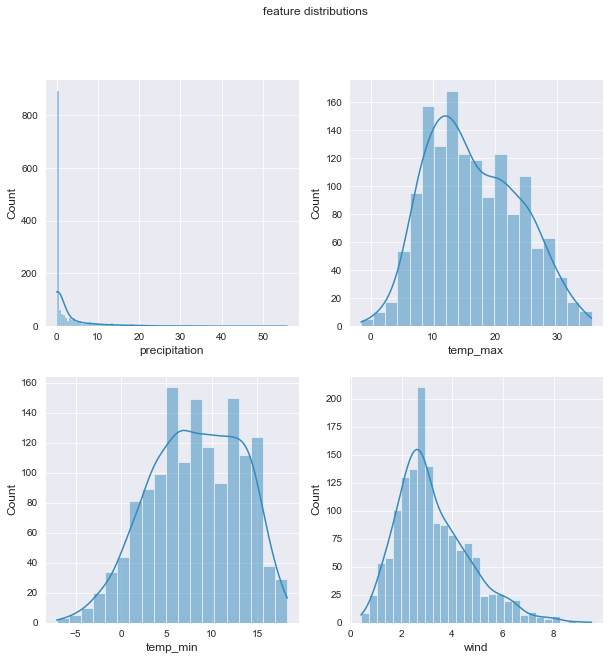

In [280]:
sns.set_style('darkgrid')
fig, axes = plt.subplots(2,2,figsize=(10,10))
sns.histplot(x='precipitation',kde=True,ax=axes[0,0],data=data)
sns.histplot(x='temp_max',kde=True,ax=axes[0,1],data=data)
sns.histplot(x='temp_min',kde=True,ax=axes[1,0],data=data)
sns.histplot(x='wind',kde=True,ax=axes[1,1],data=data)
plt.suptitle('feature distributions')

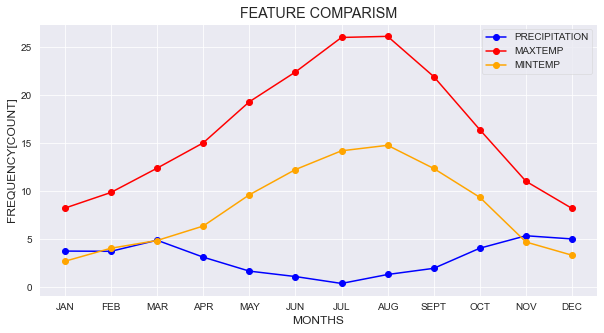

In [281]:
xlabel=['JAN','FEB','MAR','APR','MAY','JUN','JUL','AUG','SEPT','OCT','NOV','DEC']
plt.figure(figsize=(10,5))
plt.plot(data.month.unique(),month_prep,marker='o',color='blue',label='PRECIPITATION')
plt.plot(data.month.unique(),temp_max,marker='o',color='red',label='MAXTEMP')
plt.plot(data.month.unique(),temp_min,marker='o',color='orange',label='MINTEMP')
plt.xticks(ticks=data.month.unique().tolist(),labels=xlabel)
plt.xlabel('MONTHS')
plt.ylabel('FREQUENCY[COUNT]')
plt.title('FEATURE COMPARISM')
plt.legend()

In [282]:
data.columns

Index(['precipitation', 'temp_max', 'temp_min', 'wind', 'weather', 'year',
       'month', 'day'],
      dtype='object')

In [283]:
data=data[['precipitation', 'temp_max', 'temp_min', 'wind', 'weather']].copy()
data

,precipitation,temp_max,temp_min,wind,weather
0,0.0,12.8,5.0,4.7,drizzle
1,10.9,10.6,2.8,4.5,rain
2,0.8,11.7,7.2,2.3,rain
3,20.3,12.2,5.6,4.7,rain
4,1.3,8.9,2.8,6.1,rain
...,...,...,...,...,...
1456,8.6,4.4,1.7,2.9,rain
1457,1.5,5.0,1.7,1.3,rain
1458,0.0,7.2,0.6,2.6,fog
1459,0.0,5.6,-1.0,3.4,sun


In [284]:
data_n=data.join(pd.get_dummies(data.weather))

In [285]:
data_n=data_n[['precipitation', 'temp_max', 'temp_min', 'wind',  'rain']].copy()

In [286]:
data_n

,precipitation,temp_max,temp_min,wind,rain
0,0.0,12.8,5.0,4.7,0
1,10.9,10.6,2.8,4.5,1
2,0.8,11.7,7.2,2.3,1
3,20.3,12.2,5.6,4.7,1
4,1.3,8.9,2.8,6.1,1
...,...,...,...,...,...
1456,8.6,4.4,1.7,2.9,1
1457,1.5,5.0,1.7,1.3,1
1458,0.0,7.2,0.6,2.6,0
1459,0.0,5.6,-1.0,3.4,0


In [287]:
x = data_n.drop('rain',axis=1)
y = data_n['rain']

In [288]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.8,random_state=101)

In [289]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
model.fit(x_train,y_train)

LogisticRegression()

In [290]:
predictions=model.predict(x_train)
predictions

array([0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1,
       1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0,
       0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0,
       0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0,
       0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1,
       0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1,
       1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1,
       0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0,
       1, 1, 1, 0, 0, 0], dtype=uint8)

In [291]:
model.score(x_train,y_train)

0.8561643835616438

now for the test sample

In [292]:
model.fit(x_test,y_test)

LogisticRegression()

In [293]:
predictions1=model.predict(x_test)

In [294]:
model.score(x_test,y_test)

0.8571428571428571

In [295]:
model.predict([[17,15,10,8]])

array([1], dtype=uint8)

In [296]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
print(confusion_matrix(y_test,predictions1))
print(classification_report(y_test,predictions1))
print(accuracy_score(y_test,predictions1))

[[604  51]
 [116 398]]
              precision    recall  f1-score   support

           0       0.84      0.92      0.88       655
           1       0.89      0.77      0.83       514

    accuracy                           0.86      1169
   macro avg       0.86      0.85      0.85      1169
weighted avg       0.86      0.86      0.86      1169

0.8571428571428571
